<h1> Deep Learning Small Project </h1>

In [1]:
%matplotlib inline

# Display
from IPython.display import Image

# Torch
import torch
from torch.utils.data import DataLoader
from torch import optim, nn
from torchvision import transforms

# Custom
import data
import model
import utils

Defining Model Parameters

In [2]:
N_EPOCH = 200
L_RATE_FL = 0.015482051772781362
BATCH_SIZE_FL = 16
DROPOUT_FL = 0.1258685286441622
WD_FL = 0.018373534139734887
L_RATE_SL = 0.00022040717935498526
BATCH_SIZE_SL = 64
DROPOUT_SL = 0.07216065625585566
WD_SL = 0.08267768486777832
PATIENCE = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

augmentations = transforms.Compose([
    transforms.CenterCrop((140,140)),
    transforms.RandomAffine(degrees = 0, translate = (0.1,0), scale=(1,1.05)),
    transforms.ToTensor(),
    transforms.Normalize((0.4824,),(0.2363,))  
])

augmentations2 = transforms.Compose([
    transforms.CenterCrop((140,140)),
    transforms.RandomAffine(degrees = 0, translate = (0.1,0), scale=(1,1.05)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor(),
    transforms.Normalize((0.4824,),(0.2363,))  
])


normalization = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4824,),(0.2363,)) 
])

Using Custom Dataloader, Data Split for First Layer classification task (normal vs infected)

In [3]:
fl_labels = {
0 : "Normal",
1 : "Infected"
}

fl_train = data.Lung_Dataset('train', verbose = 0, transform=augmentations)
fl_test = data.Lung_Dataset('val', verbose = 0, transform = normalization)
fl_val = data.Lung_Dataset('test', verbose = 0, transform = normalization)

"""
Data Split for Second Layer classification task (COVID vs Non-COVID) 
"""

sl_labels = {
0 : "COVID",
1 : "Non-COVID"
}

sl_train = data.Lung_Dataset('train', verbose = 2, transform=augmentations2)
sl_test = data.Lung_Dataset('val', verbose = 2, transform = normalization)
sl_val = data.Lung_Dataset('test', verbose = 2, transform = normalization)

"""
Data Split for combined classification task (normal vs COVID vs Non-COVID) 
"""

combined_labels = {
0 : "Normal",
1 : "COVID",
2 : "Non-COVID"
}

final_val = data.Lung_Dataset('test', verbose = 1, transform = normalization)
final_test = data.Lung_Dataset('val', verbose = 1, transform = normalization)

Training the First Layer Model

Training the first model to classify normal and infected images


Epoch 1


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.43688448251057893
Validation set accuracy:  82.11382113821138 %


Epoch 2


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7507243596781523
Validation set accuracy:  72.35772357723577 %


Epoch 3


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.4517450312582346
Validation set accuracy:  84.39024390243902 %


Epoch 4


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.3374347277940848
Validation set accuracy:  87.3170731707317 %


Epoch 5


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.5895095177185841
Validation set accuracy:  79.02439024390245 %


Epoch 6


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7268497334458889
Validation set accuracy:  73.17073170731707 %


Epoch 7


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.5093129799725153
Validation set accuracy:  77.72357723577235 %


Epoch 8


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7131722293412074
Validation set accuracy:  77.07317073170732 %


Epoch 9


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 1.27134444593237
Validation set accuracy:  71.869918699187 %


Epoch 10


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.406121596120871
Validation set accuracy:  85.20325203252033 %


Epoch 11


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.597694225800343
Validation set accuracy:  78.04878048780488 %


Epoch 12


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.7919708730127567
Validation set accuracy:  74.3089430894309 %


Epoch 13


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.4872860108048488
Validation set accuracy:  82.92682926829268 %


Epoch 14


  0%|          | 0/326 [00:00<?, ?it/s]

Validation loss: 0.5434045652166392
Validation set accuracy:  79.51219512195122 %



Test Accuracy of the first model:
Test set accuracy:  76.0 %


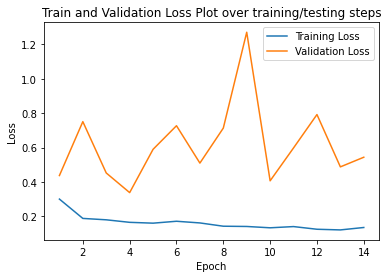

In [4]:
#First Model Training
fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE_FL, shuffle=True)
fl_test_loader = DataLoader(fl_test, batch_size=BATCH_SIZE_FL, shuffle=True)
    
fl_model = model.CNN(dropout=DROPOUT_FL).to(device)
fl_optimizer = optim.AdamW(fl_model.parameters(), lr=L_RATE_FL, weight_decay = WD_FL)
    
print("Training the first model to classify normal and infected images")
model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")

print("\n\n")
print("Test Accuracy of the first model:")
model.test(fl_model, device, fl_test_loader)

fl_model.to("cpu")
    
model.save_model(fl_model, fl_optimizer, './saved_models/fl_model_augmentations.pth')

Training the Second Layer Model

In [ ]:
#Second Model Training
sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE_SL, shuffle=True)
sl_test_loader = DataLoader(sl_test, batch_size=BATCH_SIZE_SL, shuffle=True)
    
sl_model = model.CNN(dropout=DROPOUT_SL).to(device)  
sl_optimizer = optim.Adam(sl_model.parameters(), lr=L_RATE_SL, weight_decay = WD_SL)
    
print("\n\n")
print("Training the second model to classify COVID and non-COVID images")
model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
    
print("\n\n")
print("Test Accuracy of the second model:")
model.test(sl_model, device, sl_test_loader)
    
sl_model.to("cpu")
    
model.save_model(sl_model, sl_optimizer, './saved_models/sl_model_augmentations.pth')




Training the second model to classify COVID and non-COVID images


Epoch 1


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.6116971174875895
Validation set accuracy:  70.60367454068242 %


Epoch 2


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5504133303960165
Validation set accuracy:  65.61679790026247 %


Epoch 3


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5267924418052038
Validation set accuracy:  81.62729658792651 %


Epoch 4


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5409970730543137
Validation set accuracy:  67.45406824146981 %


Epoch 5


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5811852216720581
Validation set accuracy:  63.77952755905512 %


Epoch 6


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.5091564754645029
Validation set accuracy:  71.91601049868767 %


Epoch 7


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.4766240219275157
Validation set accuracy:  77.16535433070867 %


Epoch 8


  0%|          | 0/61 [00:00<?, ?it/s]

Validation loss: 0.47908712923526764
Validation set accuracy:  76.37795275590551 %


Epoch 9


  0%|          | 0/61 [00:00<?, ?it/s]

Analyzing the performance of each model (first layer and second layer models) 

Learning Curve of the First Layer Model

In [ ]:
Image(filename='./saved_graphs/fl_learning_curve_augmented.png') 

Learning Curve of the Second Layer Model

In [ ]:
Image(filename='./saved_graphs/sl_learning_curve_augmented.png') 

Combine the 2 Models and Test the results on validation and test

In [ ]:
final_val_loader = DataLoader(final_val, batch_size=BATCH_SIZE_FL, shuffle=False)
final_test_loader = DataLoader(final_test, batch_size=BATCH_SIZE_FL, shuffle=False)
    
combined_model = model.load_combined('./saved_models/fl_model_augmentations.pth','./saved_models/sl_model_augmentations.pth' ,
                                     L_RATE_FL, DROPOUT_FL, WD_FL, L_RATE_SL, DROPOUT_SL, WD_SL)
pred = combined_model.predict_loader(device, final_val_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_val_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)
print("Validation Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))
print()
pred = combined_model.predict_loader(device, final_test_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_test_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)

print("Test Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))

print("\n\n")
print("Visualizing the Test Set: ")
utils.generate_performance_display(final_test_loader, pred, combined_labels)